## Factor Analysis

**In Dimesionality Reduction as a rule of thumb:**
- We use **PCA (Principal Component Analysis)** when we just want to reduce the size of the dataset and not trying to derive any meaning from the extracted components.
- We use **FA (Factor Analysis)** when we are trying to find the presence of latent variable (extracted factors) which explains the pattern of observed variables.


In [1]:
# Import important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set working directory
os.chdir(r"E:\PGP BA - greatlearning\GitHub\Factor Analysis")

In [3]:
# Load dataset
cereal = pd.read_csv("cereal.csv")

In [4]:
# Check info of dataset
cereal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 26 columns):
Cereals       235 non-null object
Filling       235 non-null int64
Natural       235 non-null int64
Fibre         235 non-null int64
Sweet         235 non-null int64
Easy          235 non-null int64
Salt          235 non-null int64
Satisfying    235 non-null int64
Energy        235 non-null int64
Fun           235 non-null int64
Kids          235 non-null int64
Soggy         235 non-null int64
Economical    235 non-null int64
Health        235 non-null int64
Family        235 non-null int64
Calories      235 non-null int64
Plain         235 non-null int64
Crisp         235 non-null int64
Regular       235 non-null int64
Sugar         235 non-null int64
Fruit         235 non-null int64
Process       235 non-null int64
Quality       235 non-null int64
Treat         235 non-null int64
Boring        235 non-null int64
Nutritious    235 non-null int64
dtypes: int64(25), object(1)
memory 

In [5]:
# Check head of dataset
cereal.head()

,Cereals,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy,Fun,...,Plain,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
0,Weetabix,5,5,5,1,2,1,5,4,1,...,3,1,4,1,1,3,5,1,1,5
1,SpecialK,1,2,2,1,5,2,5,1,1,...,5,5,1,2,1,5,2,1,1,3
2,SpecialK,5,4,5,5,5,3,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,CMuesli,5,5,5,3,5,2,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,CornFlakes,4,5,3,2,5,2,5,4,5,...,1,5,3,1,1,3,5,5,1,4


- Their are no missing values
- Let's drop Cereals column

In [6]:
# Let's drop Cereal variable
crl = cereal.drop(["Cereals"], axis=1)
crl.head()

,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy,Fun,Kids,...,Plain,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
0,5,5,5,1,2,1,5,4,1,4,...,3,1,4,1,1,3,5,1,1,5
1,1,2,2,1,5,2,5,1,1,5,...,5,5,1,2,1,5,2,1,1,3
2,5,4,5,5,5,3,5,5,5,5,...,1,5,4,3,1,2,5,4,1,5
3,5,5,5,3,5,2,5,5,5,5,...,1,1,4,2,5,2,5,5,1,5
4,4,5,3,2,5,2,5,4,5,5,...,1,5,3,1,1,3,5,5,1,4


### Adequacy Test

Before performing factor analysis, we need to evaluate the “factorability” of our dataset which means "can we find the factors in the dataset?". Two methods to check the factorability are:
- **Bartlett’s Test**
- **Kaiser-Meyer-Olkin Test**


### Bartlett’s Test
Bartlett’s test of sphericity checks whether or not the observed variables are intercorrelate, using the observed correlation matrix against the identity matrix.
- Null Hypothesis (H0) - Correlation matrix is an identity matrix.
- Alternative Hypothesis (H1) - Correlation matrix is not an identity matrix.
- Let's take significane level (alpha) as 5%

In [7]:
# Check Bartlett’s test of sphericity 
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq_value, p_value = calculate_bartlett_sphericity(crl)
chi_sq_value, p_value

(2912.007874616684, 0.0)

- As P value is 0 which is less than .05 we can say that the test is statistically significant and we reject the null hypothesis that correlation matrix is an identity matrix.

### Kaiser-Meyer-Olkin (KMO) Test
KMO Test measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable.
- KMO values range between 0 and 1
- Value of KMO less than 0.6 is considered inadequate.

In [8]:
# Check KMO Test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(crl)
kmo_model

0.8536195001450433

- The overall KMO for our data is 0.85, which is excellent. We can proceed with factor analysis.

### FA

In [9]:
# Get correlation matrix
corr_matrix = crl.corr()
corr_matrix

,Filling,Natural,Fibre,Sweet,Easy,Salt,Satisfying,Energy,Fun,Kids,...,Plain,Crisp,Regular,Sugar,Fruit,Process,Quality,Treat,Boring,Nutritious
Filling,1.000000,0.539690,0.552003,0.190400,0.236529,-0.036266,0.648507,0.636759,0.265214,0.160007,...,-0.250648,0.126501,0.420499,-0.078519,0.261166,-0.231719,0.443217,0.337642,-0.177851,0.526215
Natural,0.539690,1.000000,0.652290,-0.090942,0.230948,-0.216872,0.463247,0.493542,0.081903,0.060293,...,-0.138513,0.021529,0.417638,-0.316804,0.300150,-0.304544,0.579100,0.169398,-0.217587,0.650726
Fibre,0.552003,0.652290,1.000000,-0.037398,0.171722,-0.174888,0.408047,0.503731,0.062731,-0.094831,...,-0.122846,0.048324,0.648376,-0.225567,0.293141,-0.195230,0.513194,0.139677,-0.099259,0.713065
Sweet,0.190400,-0.090942,-0.037398,1.000000,0.131211,0.443991,0.184777,0.184961,0.327223,0.123243,...,-0.289559,0.262766,-0.025180,0.648383,0.346505,0.118519,-0.077547,0.376275,-0.200334,-0.047160
Easy,0.236529,0.230948,0.171722,0.131211,1.000000,0.026937,0.362310,0.182630,0.248246,0.251968,...,0.017652,0.252224,0.105246,-0.005732,0.037197,-0.048326,0.171421,0.198897,-0.167536,0.205120
Salt,-0.036266,-0.216872,-0.174888,0.443991,0.026937,1.000000,0.000054,-0.067136,0.033475,0.032982,...,0.021372,0.103372,-0.164530,0.591771,0.025574,0.304837,-0.217852,0.127896,0.112231,-0.160096
Satisfying,0.648507,0.463247,0.408047,0.184777,0.362310,0.000054,1.000000,0.599667,0.354852,0.312194,...,-0.179502,0.276203,0.328259,-0.081195,0.253844,-0.164999,0.474722,0.382168,-0.315605,0.498797
Energy,0.636759,0.493542,0.503731,0.184961,0.182630,-0.067136,0.599667,1.000000,0.350327,0.130572,...,-0.255773,0.248298,0.385719,-0.086070,0.274384,-0.101570,0.457036,0.322462,-0.223389,0.535777
Fun,0.265214,0.081903,0.062731,0.327223,0.248246,0.033475,0.354852,0.350327,1.000000,0.349966,...,-0.322275,0.402670,0.136732,0.165291,0.251421,-0.002202,0.224503,0.586497,-0.298064,0.155230
Kids,0.160007,0.060293,-0.094831,0.123243,0.251968,0.032982,0.312194,0.130572,0.349966,1.000000,...,0.029213,0.301946,-0.025831,-0.015892,-0.232121,0.026971,0.116348,0.285288,-0.193728,0.034435


In [10]:
# Create Factor Analysis object and perform Factor Analysis 
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None, n_factors=25)
fa.fit(crl)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=25, rotation=None, rotation_kwargs={},
               use_smc=True)

In [11]:
# Check eigen values
ev, v = fa.get_eigenvalues()
ev

array([6.5044682 , 3.8210452 , 2.50199528, 1.68399409, 1.08535397,
       0.93300686, 0.8516405 , 0.78683657, 0.73171687, 0.69585069,
       0.6468294 , 0.54795846, 0.52915688, 0.48962363, 0.41774279,
       0.38707401, 0.362461  , 0.35882947, 0.30475407, 0.27419206,
       0.26244808, 0.24227943, 0.2179754 , 0.19853087, 0.16423623])

- First 5 Factors have eigen values greater than one, Let's go with 4 Factors as 5th Factor is almost 1.

In [12]:
# Check the variance explained by the Factors
var, pro_var, cum_var = fa.get_factor_variance()
cum_var

array([0.25283743, 0.39598179, 0.48726182, 0.54082838, 0.57136705,
       0.59448084, 0.61625748, 0.63629268, 0.6541905 , 0.67019849,
       0.68228715, 0.69319543, 0.70371705, 0.7127816 , 0.71946211,
       0.72531731, 0.7307539 , 0.73490219, 0.73809819, 0.7405095 ,
       0.74226953, 0.74324346, 0.74381455, 0.74408777, 0.74408777])

- 54% variance is explained by first 4 Factors.

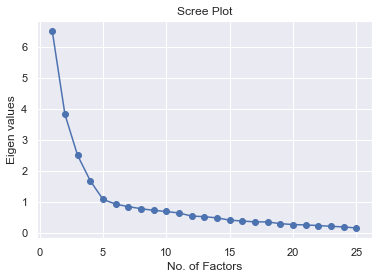

In [13]:
# To select right no. of Factors, let's visualize through Scree Plot
plt.scatter(range(1, 26), ev)
plt.plot(range(1, 26), ev)
plt.title("Scree Plot")
plt.xlabel("No. of Factors")
plt.ylabel("Eigen values")
plt.show()

- Scree plot shows 4 Factors have Eigen value greater than 1 and 5th Factor is almost close to one.

In [14]:
# Create new Factor Analysis object with 4 Factors
fa_final = FactorAnalyzer(rotation=None, n_factors=4)
fa_final.fit(crl)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation=None, rotation_kwargs={},
               use_smc=True)

In [15]:
# Get Factor loadings
fa_final.loadings_

array([[ 0.72093815,  0.10195079, -0.06696522,  0.18423476],
       [ 0.73108196, -0.23940327, -0.10777383,  0.10626122],
       [ 0.72336509, -0.23733801, -0.30950845,  0.16604901],
       [ 0.08474679,  0.74281855, -0.20677536,  0.14686624],
       [ 0.31574528,  0.14277363,  0.19843983,  0.10565493],
       [-0.20829751,  0.50532992, -0.14212289,  0.40830344],
       [ 0.72082562,  0.18086112,  0.15826122,  0.1686811 ],
       [ 0.69770567,  0.13082269, -0.06644296,  0.11831703],
       [ 0.38789499,  0.49176637,  0.20583115, -0.161091  ],
       [ 0.21752121,  0.28391883,  0.76392101,  0.11974865],
       [-0.09713893, -0.22540239,  0.14690732,  0.39911965],
       [ 0.14990678, -0.23048711,  0.47120027,  0.10190097],
       [ 0.81272496, -0.30834078, -0.11115391,  0.07971818],
       [ 0.30828154,  0.21827843,  0.67140715,  0.02551811],
       [-0.16123363,  0.56602439, -0.1721807 ,  0.21022796],
       [-0.30864487, -0.36013324,  0.22320902,  0.43170282],
       [ 0.28684292,  0.

In [16]:
# Convert loading in to dataframe with index as 25 attributes
Factor_load = pd.DataFrame(fa_final.loadings_, index=corr_matrix.index)
Factor_load

,0,1,2,3
Filling,0.720938,0.101951,-0.066965,0.184235
Natural,0.731082,-0.239403,-0.107774,0.106261
Fibre,0.723365,-0.237338,-0.309508,0.166049
Sweet,0.084747,0.742819,-0.206775,0.146866
Easy,0.315745,0.142774,0.198440,0.105655
Salt,-0.208298,0.505330,-0.142123,0.408303
Satisfying,0.720826,0.180861,0.158261,0.168681
Energy,0.697706,0.130823,-0.066443,0.118317
Fun,0.387895,0.491766,0.205831,-0.161091
Kids,0.217521,0.283919,0.763921,0.119749


- We get below Factors as per respective high loadings.
- But it is not exactly what we would want as naming the Factors is difficult here.
- Let's try with varimax rotation.

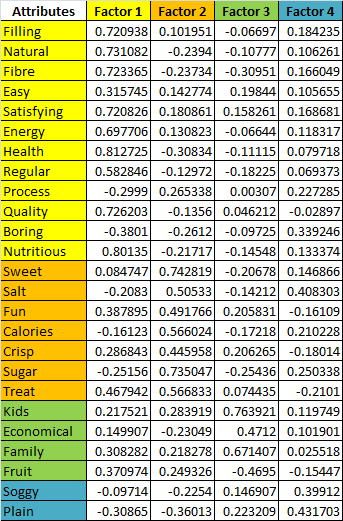

In [17]:
# Let's do Factor Analysis with 4 Factors and with Varimax rotation
fa_final2 = FactorAnalyzer(n_factors=4, rotation="varimax")
fa_final2.fit(crl)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [18]:
# Get Factor loadings
fa_final2.loadings_

array([[ 0.70592589,  0.0881672 ,  0.1982215 ,  0.15223663],
       [ 0.75280037, -0.20891137,  0.05474021,  0.03677697],
       [ 0.82120347, -0.11639735, -0.12085931,  0.02058339],
       [ 0.06894584,  0.70178978,  0.07196753,  0.34762826],
       [ 0.23856417,  0.06357645,  0.3245547 ,  0.0658038 ],
       [-0.09182649,  0.68561728,  0.01571794, -0.08310583],
       [ 0.62589612,  0.07698709,  0.42241514,  0.17231578],
       [ 0.65968446,  0.07820975,  0.19124257,  0.21082528],
       [ 0.16347898,  0.17657778,  0.41501556,  0.48007338],
       [-0.02432243,  0.03505023,  0.85078125,  0.01384181],
       [ 0.03318023,  0.0146513 ,  0.09618646, -0.48015939],
       [ 0.06887369, -0.28026534,  0.41605734, -0.22718692],
       [ 0.8285314 , -0.28827387,  0.05112023,  0.04611607],
       [ 0.06245503, -0.05453162,  0.76062903,  0.09322476],
       [-0.11364368,  0.62664876, -0.00837172,  0.12061605],
       [-0.1464441 , -0.06165003,  0.07112171, -0.65638579],
       [ 0.07393194,  0.

In [19]:
# Convert loading in to dataframe with index as 25 attributes
Factor_load2 = pd.DataFrame(fa_final2.loadings_, index=corr_matrix.index)
Factor_load2

,0,1,2,3
Filling,0.705926,0.088167,0.198222,0.152237
Natural,0.752800,-0.208911,0.054740,0.036777
Fibre,0.821203,-0.116397,-0.120859,0.020583
Sweet,0.068946,0.701790,0.071968,0.347628
Easy,0.238564,0.063576,0.324555,0.065804
Salt,-0.091826,0.685617,0.015718,-0.083106
Satisfying,0.625896,0.076987,0.422415,0.172316
Energy,0.659684,0.078210,0.191243,0.210825
Fun,0.163479,0.176578,0.415016,0.480073
Kids,-0.024322,0.035050,0.850781,0.013842


- Now we get right attributes under right Factors after Varimax rotation.
- All 4 Factors are named accordingly.

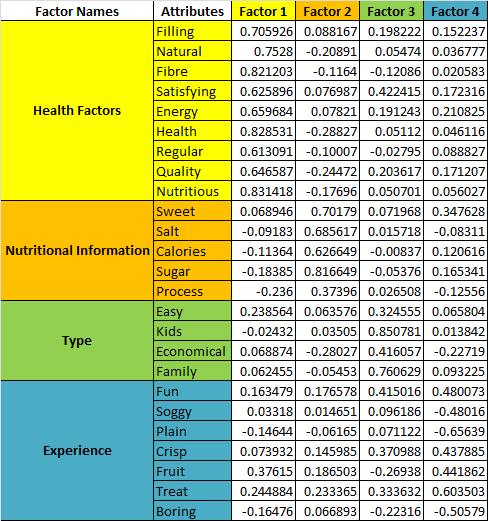

In [20]:
# Get final Factorscores (Latent variables extracted from observed variables)
fa_scores = fa_final2.transform(crl)
pd.DataFrame(fa_scores, columns=["Health Factors", "Nutritional Information", "Type", "Experience"])

,Health Factors,Nutritional Information,Type,Experience
0,1.511203,-1.227816,0.205665,-1.623202
1,-2.071909,-0.588471,1.374526,-1.162636
2,1.473021,0.812784,1.088764,0.696806
3,1.647908,-0.057011,0.503627,1.035769
4,0.414373,-0.798018,1.162082,1.180994
...,...,...,...,...
230,-0.049875,-0.852050,0.007291,-1.038142
231,0.542971,0.801985,-0.184593,1.278528
232,0.187454,-0.898705,-0.030857,-0.212396
233,-0.619609,-0.234930,-0.743400,-0.332749
